In [135]:
import pandas as pd
import re
from langdetect import detect

# 쉼표가 포함된 CSV 파일 읽기 - 모든 필드를 하나의 컬럼으로 처리
df = pd.read_csv('.data/squid_game_reviews.csv',
                 header=0,  # 첫 줄을 헤더로 사용
                 quoting=1,  # QUOTE_ALL - 따옴표로 감싸진 필드 처리
                 on_bad_lines='skip')  # 문제 있는 줄은 건너뛰기

print(f"전체 리뷰: {len(df)}개")

# 언어 감지 함수
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

df['language'] = df['review_text'].apply(detect_language)
df = df[df['language'] == 'en'].copy()

print(f"영어 리뷰: {len(df)}개")
df_review = df[['review_text']].copy()
df_review['review_text'] = df_review['review_text'].str.lower()

print("\n첫 10개 샘플:")
print(df_review.head(10))

전체 리뷰: 897개
영어 리뷰: 852개

첫 10개 샘플:
                                         review_text
0  masterpiece on all levels like nothing else on...
1  amazing show with thrill and suspense througho...
2         great story and characters.a lot to enjoy.
3  a strong message with a powerful plot. absolut...
4  a brilliant season in everything. every detail...
5  one of the most original shows i’ve seen in years
6  one of the most inventive and well-crafted tel...
7  this show really gets how the human mind works...
8  squid game season 1 remains a great series wit...
9  the first season of squid game is a masterpiec...


In [136]:
df_review['review_text'] = df_review['review_text'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_review.head(10)

,review_text
0,masterpiece on all levels like nothing else on...
1,amazing show with thrill and suspense througho...
2,great story and charactersa lot to enjoy
3,a strong message with a powerful plot absolute...
4,a brilliant season in everything every detail ...
5,one of the most original shows ive seen in years
6,one of the most inventive and wellcrafted tele...
7,this show really gets how the human mind works...
8,squid game season 1 remains a great series wit...
9,the first season of squid game is a masterpiec...


In [137]:
print(f"총 리뷰 수: {len(df_review)}")
full_reviews = df_review['review_text'].isna()
print(f'empty_reviews : {full_reviews.sum()}')

총 리뷰 수: 852
empty_reviews : 0


In [138]:
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"여러 공백이 있는 리뷰: {multiple_spaces.sum()}개")
if multiple_spaces.sum() > 0:
    print("예시:")
    print(df_review[multiple_spaces]['review_text'].head(10))

여러 공백이 있는 리뷰: 73개
예시:
13     despite having some intense scenes with an int...
41     squid game s1 offers creative storytelling com...
45                  greatest show on netflix  hands down
52     squid game season 1 exploded onto the global s...
76     this season gripped onto the main plot  the ri...
101                              best movie of 2021  sad
114    this was awesome i loved it such a good season...
123    season average 8222 lets begin with this extre...
135    a must see show  very good idea and execution ...
137    an amazingly creative dark satire on class exp...
Name: review_text, dtype: object


In [139]:
df_review['review_text'] = df_review['review_text'].str.replace(r'\s+',' ')
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"여러 공백이 있는 리뷰: {multiple_spaces.sum()}개")
if multiple_spaces.sum() > 0:
    print("예시:")
    print(df_review[multiple_spaces]['review_text'].head(3))

여러 공백이 있는 리뷰: 73개
예시:
13    despite having some intense scenes with an int...
41    squid game s1 offers creative storytelling com...
45                 greatest show on netflix  hands down
Name: review_text, dtype: object


In [140]:
leading_spaces = df_review['review_text'].str.match(r'^\s')
print(f"앞 공백: {leading_spaces.sum()}개")
if leading_spaces.sum() > 0:
    print("\n앞 공백이 있는 리뷰:")
    print(df_review[leading_spaces]['review_text'])

앞 공백: 3개

앞 공백이 있는 리뷰:
147     7910 very very very watchable i watched episo...
638     this show had me i was gripped the entire tim...
713     wildly entertaining this south korean surviva...
Name: review_text, dtype: object


In [141]:
trailing_spaces = df_review['review_text'].str.match(r'\s$')
print(f"뒤 공백: {trailing_spaces.sum()}개")
if trailing_spaces.sum() > 0:
    print("\n뒤 공백이 있는 리뷰:")
    print(df_review[trailing_spaces]['review_text'])

뒤 공백: 0개


In [142]:
both_spaces = leading_spaces | trailing_spaces
print(f"앞뒤 공백 총: {both_spaces.sum()}개")
if both_spaces.sum() > 0:
    print("\n앞 공백이 있는 리뷰:")
    print(df_review[both_spaces]['review_text'])

앞뒤 공백 총: 3개

앞 공백이 있는 리뷰:
147     7910 very very very watchable i watched episo...
638     this show had me i was gripped the entire tim...
713     wildly entertaining this south korean surviva...
Name: review_text, dtype: object


In [143]:
df_review['review_text'] = df_review['review_text'].str.strip()

In [144]:
both_spaces = df_review['review_text'].str.match(r'^\s|\s$')
print(f"제거 후: {both_spaces.sum()}개")

제거 후: 0개


In [145]:
# min_words = df_review['review_text'].str.split().str.len()
# print(f"단어 1-2개 리뷰: {(min_words < 3).sum()}개")
# df_review = df_review[min_words >= 3]
# print(df_review[min_words <= 3])

In [146]:
# import os
# from pathlib import Path
# from datetime import datetime

# # 현재 작업 디렉토리 확인
# print(f"현재 작업 디렉토리: {os.getcwd()}")

# # 저장 경로를 명시적으로 지정
# output_path = Path(os.getcwd()) / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"

# try:
#     # 데이터프레임 저장
#     df_review.to_csv(output_path, index=False, encoding='utf-8-sig')  # BOM 추가로 Excel 호환성 개선
#     print(f"✅ 전처리 완료 및 저장: {output_path}")
#     print(f"📊 저장된 행 수: {len(df_review)}")
# except Exception as e:
#     print(f"❌ 저장 실패: {e}")
#     # 대안: 홈 디렉토리에 저장
#     home_path = Path.home() / "Documents" / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
#     df_review.to_csv(home_path, index=False, encoding='utf-8-sig')
#     print(f"✅ 대체 경로에 저장: {home_path}")

In [147]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df = df_review.copy()
df['tokens'] = df['review_text'].apply(word_tokenize)
print(df[['review_text', 'tokens']].head(10))

                                         review_text  \
0  masterpiece on all levels like nothing else on...   
1  amazing show with thrill and suspense througho...   
2           great story and charactersa lot to enjoy   
3  a strong message with a powerful plot absolute...   
4  a brilliant season in everything every detail ...   
5   one of the most original shows ive seen in years   
6  one of the most inventive and wellcrafted tele...   
7  this show really gets how the human mind works...   
8  squid game season 1 remains a great series wit...   
9  the first season of squid game is a masterpiec...   

                                              tokens  
0  [masterpiece, on, all, levels, like, nothing, ...  
1  [amazing, show, with, thrill, and, suspense, t...  
2   [great, story, and, charactersa, lot, to, enjoy]  
3  [a, strong, message, with, a, powerful, plot, ...  
4  [a, brilliant, season, in, everything, every, ...  
5  [one, of, the, most, original, shows, ive, see... 

In [148]:
import nltk
from nltk.corpus import stopwords
import contractions

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'movies', 'squid',
                    'animated', 'im', 'ive', 'ill', 'id', 'dont',
                     'cant', 'wont', 'youre', 'theyre']
stop_words.update(extra_stop_words)
stop_words_list = list(stop_words)
# print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
df['filtered_tokens'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])
print(df['filtered_tokens'])

0      [masterpiece, levels, like, nothing, else, one...
1      [amazing, show, thrill, suspense, throughout, ...
2                [great, story, charactersa, lot, enjoy]
3       [strong, message, powerful, plot, absolute, see]
4      [brilliant, season, everything, every, detail,...
                             ...                        
892    [strange, violent, disturbing, adventure, soun...
893    [game, doesnt, offer, escape, horrors, real, w...
894    [overall, still, savagely, entertaining, slam,...
895    [thematic, intelligence, aside, game, also, wh...
896    [aside, stretched, touch, thin, spots, say, ga...
Name: filtered_tokens, Length: 852, dtype: object


In [150]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [151]:
# from nltk.stem import LancasterStemmer
# stemmer = LancasterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [152]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
result = []
for tokens in df['filtered_tokens']:
    lemma = [lemmatizer.lemmatize(token) for token in tokens]
    result.append(lemma)
print(result)

[['masterpiece', 'level', 'like', 'nothing', 'else', 'one', 'show', 'must', 'see', 'die'], ['amazing', 'show', 'thrill', 'suspense', 'throughout', 'kept', 'edge', 'seat', 'way'], ['great', 'story', 'charactersa', 'lot', 'enjoy'], ['strong', 'message', 'powerful', 'plot', 'absolute', 'see'], ['brilliant', 'season', 'everything', 'every', 'detail', 'absolutely', 'gorgeous', 'watch', 'forever', 'believe', 'continuation'], ['one', 'original', 'show', 'seen', 'year'], ['one', 'inventive', 'wellcrafted', 'television', 'show', 'ever', 'changed', 'game', 'opened', 'way', 'international', 'production'], ['show', 'really', 'get', 'human', 'mind', 'work', 'best', 'thing', 'show', 'offer', 'character', 'wow', 'character', 'interesting', 'complex', 'somehow', 'relatable', 'somehow', 'character', 'get', 'even', 'better', 'season', '23', 'best', 'show', 'ever', 'seen'], ['game', 'season', '1', 'remains', 'great', 'series', 'plot', 'still', 'grab', 'attention', 'today', 'beginning', 'end', 'game', 'sh

In [153]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [154]:
df['pos_tags'] = df['filtered_tokens'].apply(lambda x: nltk.pos_tag(x))
print("POS 태깅 결과 (상위 10개):")
print(df[['review_text', 'pos_tags']].head(10))

POS 태깅 결과 (상위 10개):
                                         review_text  \
0  masterpiece on all levels like nothing else on...   
1  amazing show with thrill and suspense througho...   
2           great story and charactersa lot to enjoy   
3  a strong message with a powerful plot absolute...   
4  a brilliant season in everything every detail ...   
5   one of the most original shows ive seen in years   
6  one of the most inventive and wellcrafted tele...   
7  this show really gets how the human mind works...   
8  squid game season 1 remains a great series wit...   
9  the first season of squid game is a masterpiec...   

                                            pos_tags  
0  [(masterpiece, NN), (levels, NNS), (like, IN),...  
1  [(amazing, VBG), (show, NN), (thrill, NN), (su...  
2  [(great, JJ), (story, NN), (charactersa, NN), ...  
3  [(strong, JJ), (message, NN), (powerful, JJ), ...  
4  [(brilliant, JJ), (season, NN), (everything, N...  
5  [(one, CD), (original, JJ), (s

In [155]:
import pandas as pd
from datetime import datetime

# --- 전처리 데이터 CSV 저장 (간단 버전) ---

df_complete = df[['review_text', 'filtered_tokens', 'pos_tags']].copy()

# 각 컬럼을 문자열로 변환
df_complete['filtered_tokens_str'] = df_complete['filtered_tokens'].apply(lambda x: ' '.join(x))
df_complete['pos_tags_str'] = df_complete['pos_tags'].apply(
    lambda tags: ' '.join([f"{token}/{tag}" for token, tag in tags])
)

# 최종 저장 (리스트 컬럼 제외, 3개 컬럼만)
df_final_complete = df_complete[[
    'review_text', 
    'filtered_tokens_str', 
    'pos_tags_str'
]]

# CSV 파일로 저장
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_file = f'preprocessed_parasite_complete_{timestamp}.csv'

df_final_complete.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"✅ 전처리 완료 및 저장: {output_file}")
print(f"📊 저장된 행 수: {len(df_final_complete)}")
print(f"\n📋 저장된 컬럼:")
for i, col in enumerate(df_final_complete.columns, 1):
    print(f"  {i}. {col}")

print(f"\n📄 첫 3개 샘플:")
print(df_final_complete.head(3))

✅ 전처리 완료 및 저장: preprocessed_parasite_complete_20251019_230232.csv
📊 저장된 행 수: 852

📋 저장된 컬럼:
  1. review_text
  2. filtered_tokens_str
  3. pos_tags_str

📄 첫 3개 샘플:
                                         review_text  \
0  masterpiece on all levels like nothing else on...   
1  amazing show with thrill and suspense througho...   
2           great story and charactersa lot to enjoy   

                                 filtered_tokens_str  \
0  masterpiece levels like nothing else one shows...   
1  amazing show thrill suspense throughout kept e...   
2                  great story charactersa lot enjoy   

                                        pos_tags_str  
0  masterpiece/NN levels/NNS like/IN nothing/NN e...  
1  amazing/VBG show/NN thrill/NN suspense/NN thro...  
2   great/JJ story/NN charactersa/NN lot/NN enjoy/NN  


In [156]:
my_tag_set = ['NN','NNS', 'NNP']
filtered_tokens = [token for tags in df['pos_tags'] for token, tag in tags if tag in my_tag_set]

word_cnt_filtered = dict()
for word in filtered_tokens:
    word_cnt_filtered[word] = word_cnt_filtered.get(word, 0) + 1

sorted_word_cnt_filtered = sorted(word_cnt_filtered, key=word_cnt_filtered.get, reverse=True)
print(sorted_word_cnt_filtered[:20])

['show', 'game', 'series', 'season', 'characters', 'games', 'story', 'people', 'watch', 'plot', 'time', 'episode', 'character', 'end', 'life', 'way', 'tv', 'episodes', 'shows', 'everything']


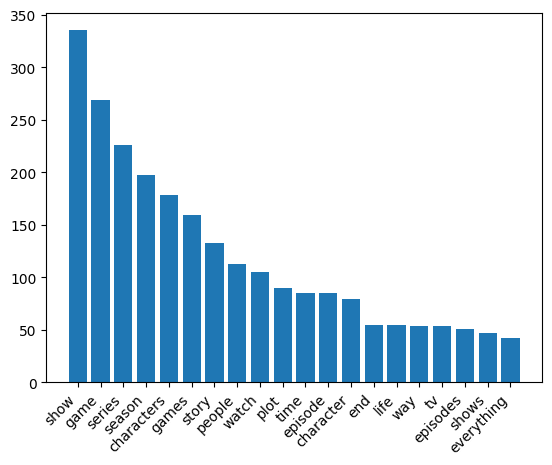

In [157]:
from wordcloud import WordCloud
import matplotlib.pylab as plt
key = sorted_word_cnt_filtered[:20]
cnt = [word_cnt_filtered[k] for k in key]

plt.bar(range(len(key)), cnt, tick_label=key)
plt.xticks(rotation=45, ha='right')
plt.show()

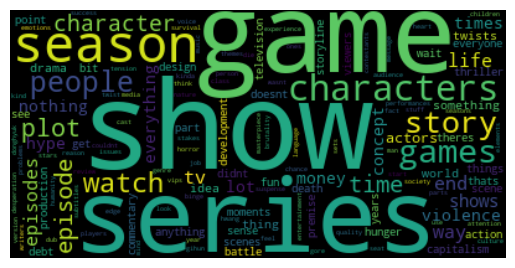

In [158]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_cnt_filtered)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

영어 리뷰: 851개


c:\dataintelligence\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



--- 최종 정제된 토큰 상위 키워드 비교 (단어만 출력) ---

[CountVectorizer 상위 단어 리스트]
['game', 'show', 'character', 'series', 'season', 'story', 'episode', 'time', 'people', 'watch', 'plot', 'life', 'end', 'way', 'tv', 'thing', 'lot', 'twist', 'hype', 'everything']

[TfidfVectorizer 상위 단어 리스트]
['show', 'game', 'season', 'series', 'character', 'story', 'episode', 'watch', 'time', 'plot', 'people', 'tv', 'hype', 'end', 'life', 'thing', 'way', 'lot', 'idea', 'violence']


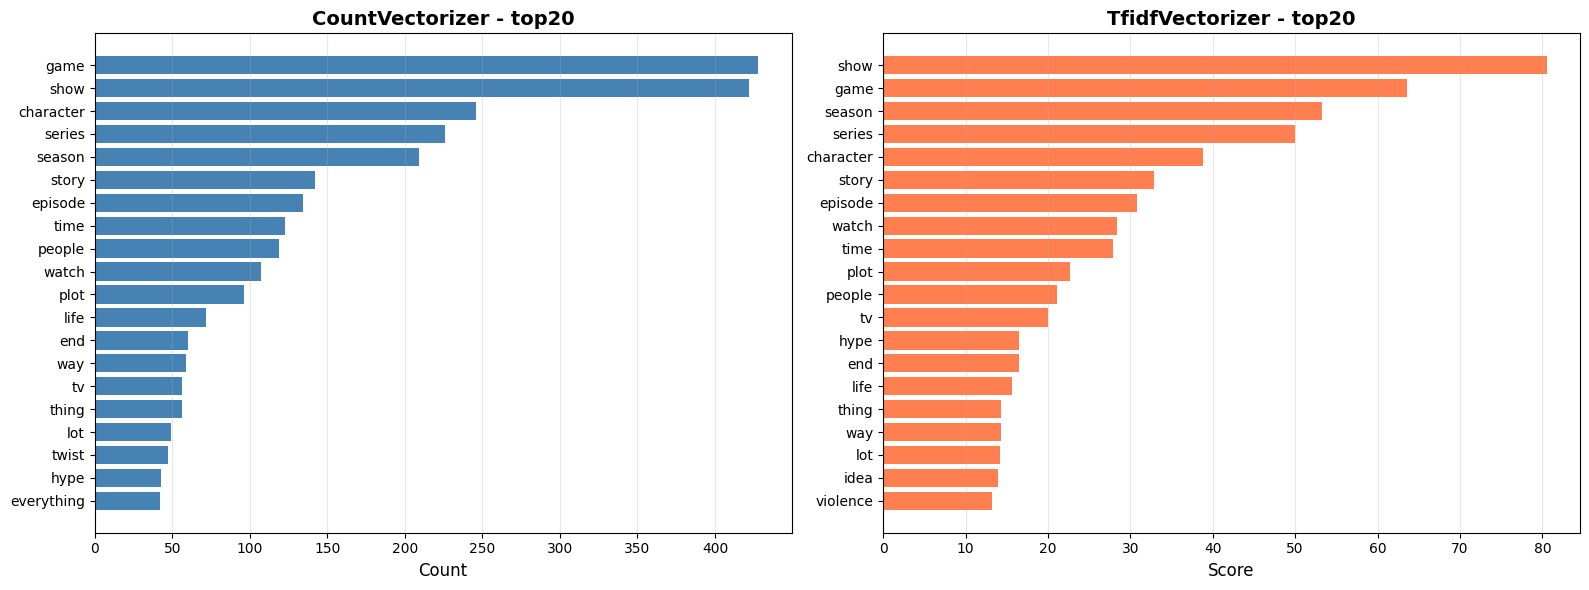

In [159]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from langdetect import detect

# CSV 파일 읽기
df = pd.read_csv('.data/squid_game_reviews.csv')

# 언어 감지 함수
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

# 영어 리뷰만 필터링
df['language'] = df['review_text'].apply(detect_language)
df_review = df[df['language'] == 'en'].copy()
print(f"영어 리뷰: {len(df_review)}개")

# Stopwords 설정
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'movies', 'squid',
                    'animated', 'im', 'ive', 'ill', 'id', 'dont',
                     'cant', 'wont', 'youre', 'theyre']
stop_words.update(extra_stop_words)

# 전처리 함수
lemmatizer = WordNetLemmatizer()
my_tag_set = {'NN', 'NNS', 'NNP'}

def preprocess_text(text):
    # 1. 소문자 변환 및 특수문자 제거 (영문자, 숫자, 공백만 유지)
    text = re.sub(r'[^a-z0-9\s]', '', text.lower())

    # 2. 토큰화
    tokens = word_tokenize(text)

    # 3. Stopwords 제거 및 길이 필터링
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]

    # 4. Lemmatization (표제어 추출)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # 5. POS Tagging & 필터링
    pos_tags = pos_tag(lemmatized_tokens)
    final_tokens = [token for token, tag in pos_tags if tag in my_tag_set]

    return final_tokens

df_review['final_tokens'] = df_review['review_text'].apply(preprocess_text)


vectorizer_config = {
    'tokenizer': lambda x: x,
    'lowercase': False,
    'max_features': 500
}

# CountVectorizer 실행
cv = CountVectorizer(**vectorizer_config)
cv_matrix = cv.fit_transform(df_review['final_tokens'])
cv_top_features = cv.get_feature_names_out()

# TfidfVectorizer 실행
tfidf = TfidfVectorizer(**vectorizer_config)
tfidf_matrix = tfidf.fit_transform(df_review['final_tokens'])
tfidf_top_features = tfidf.get_feature_names_out()

# --- 각 행렬의 단어별 총합을 계산하여 중요도 순으로 정렬하는 함수 ---
def get_top_n_features(feature_names, matrix, n=20):
    # 각 단어(feature)의 점수를 모두 더합니다.
    sum_features = matrix.sum(axis=0)

    # 단어 이름과 점수를 짝지어 DataFrame으로 만듭니다.
    features_df = pd.DataFrame(sum_features, columns=feature_names).T
    features_df.columns = ['score']

    # 점수가 높은 순으로 정렬하여 상위 n개를 반환합니다.
    return features_df.sort_values(by='score', ascending=False).head(n)

# --- 5. 결과 출력 (단어 리스트만) ---
print("\n--- 최종 정제된 토큰 상위 키워드 비교 (단어만 출력) ---")

# CountVectorizer 결과 (단순 빈도 합계 기준)
cv_top_keywords = get_top_n_features(cv_top_features, cv_matrix)
print("\n[CountVectorizer 상위 단어 리스트]")
print(cv_top_keywords.index.tolist()) # .index.tolist() 추가!


# TfidfVectorizer 결과 (TF-IDF 점수 합계 기준)
tfidf_top_keywords = get_top_n_features(tfidf_top_features, tfidf_matrix)
print("\n[TfidfVectorizer 상위 단어 리스트]")
print(tfidf_top_keywords.index.tolist()) # .index.tolist() 추가!

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# CountVectorizer 막대 그래프
cv_words = cv_top_keywords.index.tolist()
cv_scores = cv_top_keywords['score'].tolist()

ax1.barh(cv_words[::-1], cv_scores[::-1], color='steelblue')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('CountVectorizer - top20', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# TfidfVectorizer 막대 그래프
tfidf_words = tfidf_top_keywords.index.tolist()
tfidf_scores = tfidf_top_keywords['score'].tolist()

ax2.barh(tfidf_words[::-1], tfidf_scores[::-1], color='coral')
ax2.set_xlabel('Score', fontsize=12)
ax2.set_title('TfidfVectorizer - top20', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [160]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from langdetect import detect
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

id2word = corpora.Dictionary(df_review['final_tokens'])

corpus = [id2word.doc2bow(tokens) for tokens in df_review['final_tokens']]

# LDA 모델 생성
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=100, # 결과 재현성을 위한 설정
    update_every=1,
    chunksize=100,
    passes=10, # 전체 코퍼스를 몇 번 반복 학습할지 결정
    alpha='auto',
    per_word_topics=True
)

print("LDA 모델 학습이 완료되었습니다.")


# --- 4. 결과 확인 및 시각화 ---

# 4-1. 텍스트로 토픽 확인
print("\n--- 각 토픽별 주요 단어 ---")
topics = lda_model.print_topics(num_words=10) # 각 토픽별로 10개 단어 출력
for topic in topics:
    print(topic)

# 4-2. pyLDAvis를 사용한 인터랙티브 시각화
print("\nLDA 시각화 데이터를 생성하고 'lda_visualization.html' 파일로 저장합니다.")
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis_data

LDA 모델 학습이 완료되었습니다.

--- 각 토픽별 주요 단어 ---
(0, '0.075*"series" + 0.049*"watch" + 0.033*"end" + 0.031*"episode" + 0.027*"way" + 0.023*"story" + 0.023*"violence" + 0.016*"nothing" + 0.016*"everything" + 0.015*"concept"')
(1, '0.024*"game" + 0.024*"series" + 0.020*"debt" + 0.016*"look" + 0.013*"society" + 0.012*"survival" + 0.010*"genre" + 0.010*"start" + 0.009*"heart" + 0.008*"experience"')
(2, '0.077*"character" + 0.058*"season" + 0.052*"time" + 0.040*"game" + 0.036*"story" + 0.027*"episode" + 0.019*"lot" + 0.018*"plot" + 0.017*"twist" + 0.016*"something"')
(3, '0.126*"show" + 0.107*"game" + 0.039*"people" + 0.025*"life" + 0.021*"tv" + 0.017*"character" + 0.016*"world" + 0.014*"hype" + 0.014*"point" + 0.012*"money"')
(4, '0.021*"review" + 0.015*"entertainment" + 0.014*"series" + 0.013*"culture" + 0.013*"voice" + 0.012*"day" + 0.012*"writer" + 0.012*"language" + 0.011*"anything" + 0.011*"couldnt"')

LDA 시각화 데이터를 생성하고 'lda_visualization.html' 파일로 저장합니다.


c:\dataintelligence\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.100364  0.271322       1        1  30.900667
2     -0.076082 -0.271137       2        1  24.743598
0     -0.248700 -0.020116       3        1  22.741733
1      0.208234 -0.119823       4        1  12.689423
4      0.216913  0.139753       5        1   8.924580, topic_info=           Term        Freq       Total Category  logprob  loglift
3          show  341.000000  341.000000  Default  30.0000  30.0000
26    character  198.000000  198.000000  Default  29.0000  29.0000
20       season  117.000000  117.000000  Default  28.0000  28.0000
36       series  173.000000  173.000000  Default  27.0000  27.0000
71         time  105.000000  105.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1593     bottle    3.909624    4.653652   Topic5  -5.2164   2.2421
850        view    6.048793    9.313214   Topic5  -4.7799   1.9848
377    anything    7.812237   16.685013   Topic5  -4.5241   1.6575
36       series    9.961823  173.481181   Topic5  -4.2810  -0.4409
67        scene    4.947523   26.907805   Topic5  -4.9809   0.7228

[222 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
170       3  0.964891  action
53        1  0.175191   actor
53        2  0.385421   actor
53        3  0.315344   actor
53        5  0.105115   actor
...     ...       ...     ...
30        1  0.992445    work
154       1  0.984089   world
74        5  0.868651  writer
21        1  0.968437    year
592       4  0.849488   youve

[222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])